# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents


* [Introduction: Business Problem](#introduction)

* [Data](#data)

* [Methodology](#methodology)

* [Analysis](#analysis)

* [Results and Discussion](#results)

* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

In this project we will try to compare the neighborhood cities of a particular state in the US i.e. how similar & dissimilar they are. Specifically, this will be targeted to stakeholders interested in opening different types of businesses as they see fit in any particular city of US.

Since there are lots of businesses in US we will try to detect **top businesses in any particular city**. We are also particularly interested in **a certain business which is not so popular in a particular city**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We will use data science to get a few most promising neighboring cities based on the above mentioned criterion. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## 2. Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of any particular existing business in the city.
* distance of neighborhood from city center.

Following data sources will be needed to extract/generate the required information:
* List of US States and its neighbouring cities obtained from webscraping of Britannica website and then forming it into a dataframe    (.csv file)
* Number of businesses and their type and location in every neighborhood city will be obtained using **Foursquare API**

#### Before we get the data and start exploring it, let's import all the dependencies that we will need.

In [9]:
import pandas as pd # for data processing
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import folium   #for creating maps
import requests  #for retreiving Information from URL

import geocoder
from geopy.geocoders import Nominatim  #converting address to cordinates
from pandas.io.json import json_normalize #converting json to DataFrame

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### Getting the dataframe of all the US states and its cities. (Source:Britannica) (Already Webscrapped and converted into a CSV file for efficient execution)

In [10]:
df1_usa = pd.read_csv('file1.csv')
df1_usa.head()

Alabama     Alaska      Arizona       Arkansas California  \
0  Alexander City  Anchorage          Ajo    Arkadelphia    Alameda   
1       Andalusia    Cordova     Avondale  Arkansas Post   Alhambra   
2        Anniston  Fairbanks       Bisbee     Batesville    Anaheim   
3          Athens     Haines  Casa Grande         Benton    Antioch   
4          Atmore      Homer     Chandler    Blytheville    Arcadia   

       Colorado Connecticut    Delaware       Florida        Georgia  \
0       Alamosa     Ansonia       Dover  Apalachicola         Albany   
1         Aspen      Berlin       Lewes        Bartow       Americus   
2        Aurora  Bloomfield     Milford   Belle Glade  Andersonville   
3       Boulder    Branford  New Castle    Boca Raton         Athens   
4  Breckenridge  Bridgeport      Newark     Bradenton        Atlanta   

     Hawaii          Idaho           Illinois       Indiana            Iowa  \
0   Hanalei      Blackfoot              Alton      Anderson  Amana Colonies   
1      Hilo          Boise  Arlington Heights       Bedford            Ames   
2  Honaunau  Bonners Ferry             Arthur   Bloomington           Boone   
3  Honolulu       Caldwell             Aurora      Columbus      Burlington   
4   Kahului  Coeur d’Alene         Belleville  Connersville     Cedar Falls   

          Kansas       Kentucky    Louisiana       Maine  \
0        Abilene        Ashland    Abbeville      Auburn   
1  Arkansas City   Barbourville   Alexandria     Augusta   
2       Atchison      Bardstown      Bastrop      Bangor   
3        Chanute          Berea  Baton Rouge  Bar Harbor   
4    Coffeyville  Boonesborough     Bogalusa        Bath   

               Maryland Massachusetts      Michigan    Minnesota  \
0              Aberdeen      Abington        Adrian   Albert Lea   
1             Annapolis         Adams          Alma   Alexandria   
2             Baltimore      Amesbury     Ann Arbor       Austin   
3  Bethesda-Chevy Chase       Amherst  Battle Creek      Bemidji   
4                 Bowie       Andover      Bay City  Bloomington   

       Mississippi        Missouri   Montana   Nebraska        Nevada  \
0  Bay Saint Louis       Boonville  Anaconda   Beatrice  Boulder City   
1           Biloxi         Branson  Billings   Bellevue   Carson City   
2           Canton  Cape Girardeau   Bozeman  Boys Town          Elko   
3       Clarksdale        Carthage     Butte    Chadron           Ely   
4         Columbia     Chillicothe    Dillon   Columbus        Fallon   

  New Hampshire     New Jersey   New Mexico   New York North Carolina  \
0        Berlin    Asbury Park        Acoma     Albany       Asheboro   
1     Claremont  Atlantic City   Alamogordo  Amsterdam      Asheville   
2       Concord        Bayonne  Albuquerque     Auburn           Bath   
3         Derry     Bloomfield      Artesia    Babylon       Beaufort   
4         Dover     Bordentown        Belen    Batavia          Boone   

  North Dakota       Ohio  Oklahoma      Oregon Pennsylvania    Rhode Island  \
0     Bismarck      Akron       Ada      Albany     Abington      Barrington   
1  Devils Lake   Alliance     Altus     Ashland    Aliquippa         Bristol   
2    Dickinson  Ashtabula      Alva     Astoria    Allentown   Central Falls   
3        Fargo     Athens  Anadarko  Baker City      Altoona        Cranston   
4  Grand Forks  Barberton   Ardmore   Beaverton     Ambridge  East Greenwich   

  South Carolina   South Dakota    Tennessee      Texas           Utah  \
0      Abbeville       Aberdeen        Alcoa    Abilene           Alta   
1          Aiken  Belle Fourche       Athens     Alpine  American Fork   
2       Anderson      Brookings  Chattanooga   Amarillo      Bountiful   
3       Beaufort         Canton  Clarksville  Arlington   Brigham City   
4         Camden         Custer    Cleveland     Austin     Cedar City   

         Vermont         Virginia  Washington West Virginia Wisconsin  \
0          Barre         Abi

#### Selecting a state below from the list of 50 states in the above dataframe.

In [11]:
col_list= ["Alabama"]
x = 'Alabama'
state_data = pd.read_csv("file1.csv", usecols=col_list)
temp_df = state_data
temp1_df = temp_df.rename(columns={x: "Neighborhood"})
state_df= temp1_df.dropna()
state_df

Neighborhood
0   Alexander City
1        Andalusia
2         Anniston
3           Athens
4           Atmore
5           Auburn
6         Bessemer
7       Birmingham
8        Chickasaw
9          Clanton
10         Cullman
11         Decatur
12       Demopolis
13          Dothan
14      Enterprise
15         Eufaula
16        Florence
17      Fort Payne
18         Gadsden
19      Greenville
20    Guntersville
21      Huntsville
22          Jasper
23          Marion
24          Mobile
25      Montgomery
26         Opelika
27           Ozark
28     Phenix City
29        Prichard
30      Scottsboro
31           Selma
32       Sheffield
33       Sylacauga
34       Talladega
35            Troy
36      Tuscaloosa
37       Tuscumbia
38        Tuskegee

#### Get the geographical coordinates of all the neighboring cities of that state.

In [12]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}, USA'.format(neighborhood, x)) #Here x is the state you entered.
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [13]:
coords = [ get_latlng(neighborhood) for neighborhood in state_df["Neighborhood"].tolist() ]
coords

[[32.93884000000003, -85.95294999999999],
 [31.320140000000038, -86.49448999999998],
 [33.65712000000008, -85.81890999999996],
 [34.804500000000075, -86.97127999999998],
 [31.02526000000006, -87.49379999999996],
 [32.60832000000005, -85.48172999999997],
 [33.402030000000025, -86.95398999999998],
 [33.52072000000004, -86.81178999999997],
 [30.76478000000003, -88.07480999999996],
 [32.840850000000046, -86.63201999999995],
 [34.17437000000007, -86.84344999999996],
 [34.60740000000004, -86.97978999999998],
 [32.50508000000008, -87.83772999999997],
 [31.223250000000064, -85.39336999999995],
 [31.315150000000074, -85.85461999999995],
 [31.894980000000032, -85.14584999999994],
 [34.80060000000003, -87.67488999999995],
 [34.441310000000044, -85.71436999999997],
 [34.014770000000055, -86.00716999999997],
 [31.829440000000034, -86.63360999999998],
 [34.35143000000005, -86.29893999999996],
 [34.72929000000005, -86.58509999999995],
 [33.831300000000056, -87.28009999999995],
 [32.63467000000003, -8

In [14]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

#### Convert it into a dataframe and quickly examine the resulting dataframe.

In [15]:
# merge the coordinates into the original dataframe
state_df['Latitude'] = df_coords['Latitude']
state_df['Longitude'] = df_coords['Longitude']
print(state_df.shape)
state_df

(39, 3)


C:\Users\visha\AppData\Local\Temp\ipykernel_20796\2513045208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Latitude'] = df_coords['Latitude']
C:\Users\visha\AppData\Local\Temp\ipykernel_20796\2513045208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Longitude'] = df_coords['Longitude']


Neighborhood  Latitude  Longitude
0   Alexander City  32.93884  -85.95295
1        Andalusia  31.32014  -86.49449
2         Anniston  33.65712  -85.81891
3           Athens  34.80450  -86.97128
4           Atmore  31.02526  -87.49380
5           Auburn  32.60832  -85.48173
6         Bessemer  33.40203  -86.95399
7       Birmingham  33.52072  -86.81179
8        Chickasaw  30.76478  -88.07481
9          Clanton  32.84085  -86.63202
10         Cullman  34.17437  -86.84345
11         Decatur  34.60740  -86.97979
12       Demopolis  32.50508  -87.83773
13          Dothan  31.22325  -85.39337
14      Enterprise  31.31515  -85.85462
15         Eufaula  31.89498  -85.14585
16        Florence  34.80060  -87.67489
17      Fort Payne  34.44131  -85.71437
18         Gadsden  34.01477  -86.00717
19      Greenville  31.82944  -86.63361
20    Guntersville  34.35143  -86.29894
21      Huntsville  34.72929  -86.58510
22          Jasper  33.83130  -87.28010
23          Marion  32.63467  -87.31913
24          Mobile  30.68648  -88.05297
25      Montgomery  32.38015  -86.30005
26         Opelika  32.65050  -85.38065
27           Ozark  31.45895  -85.64071
28     Phenix City  32.46809  -85.00083
29        Prichard  30.73799  -88.08127
30      Scottsboro  34.68520  -86.09461
31           Selma  32.41279  -87.02282
32       Sheffield  34.75961  -87.68715
33       Sylacauga  33.17156  -86.25025
34       Talladega  33.43451  -86.10269
35            Troy  31.80967  -85.97217
36      Tuscaloosa  33.21042  -87.56625
37       Tuscumbia  34.73136  -87.70287
38        Tuskegee  32.42405  -85.68978

#### Use geopy library to get the latitude and longitude values of the selected state.

In [16]:
# get the coordinates of the state
address = '{}, USA'.format(x)

geolocator = Nominatim(user_agent="x_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {}, USA {}, {}.'.format(x, latitude, longitude))

The geograpical coordinate of Alabama, USA 33.2588817, -86.8295337.


#### Creating a map of the selected state with neighboring cities superimposed on top.

In [17]:
# create map of Toronto using latitude and longitude values
map_x = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, neighborhood in zip(state_df['Latitude'], state_df['Longitude'], state_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#6600cc',
        fill_opacity=0.7).add_to(map_x)  
    
map_x

#### Define your Foursquare Credentials.

In [18]:
CLIENT_ID = 'I1EWMQ1R1WILTIR2QLXNWSL5FTED2B2LSKBXBZIPKWZCWPPJ' # replace it with your Client id
CLIENT_SECRET = 'YF0LMXIW1I0C0E1BPY0FEMZPPDBYUPKQW5NHOUPHYE52G52D' # replace it with your client secret
VERSION = '20180605' # Foursquare API version

#### Now, lets get the top 1400 venues that are within a radius of 15 KMs or 9.3 Miles.

In [19]:
radius = 15000  #You can change these according to your preferences.
LIMIT = 1400

venues = []

for lat, long, neighborhood in zip(state_df['Latitude'], state_df['Longitude'], state_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['distance'], 
            venue['venue']['location']['lat'],  
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'Distance', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(10)

(2677, 8)


Neighborhood  Latitude  Longitude                         VenueName  \
0  Alexander City  32.93884  -85.95295           JR's Sports Bar & Grill   
1  Alexander City  32.93884  -85.95295                       Chick-Fil-A   
2  Alexander City  32.93884  -85.95295           La Posada Mexican Grill   
3  Alexander City  32.93884  -85.95295                      Ruby Tuesday   
4  Alexander City  32.93884  -85.95295  Wind Creek State Park Campground   
5  Alexander City  32.93884  -85.95295                        MAPCO Mart   
6  Alexander City  32.93884  -85.95295                         Jim Bob's   
7  Alexander City  32.93884  -85.95295                    Dollar General   
8  Alexander City  32.93884  -85.95295                   Anytime Fitness   
9  Alexander City  32.93884  -85.95295                        Winn-Dixie   

   Distance  VenueLatitude  VenueLongitude         VenueCategory  
0       607      32.944276      -85.952404   American Restaurant  
1      1639      32.926110      -85.961772  Fast Food Restaurant  
2      1729      32.926987      -85.964910    Mexican Restaurant  
3      1792      32.923765      -85.959682   American Restaurant  
4      9625      32.855093      -85.927328            Campground  
5      2509      32.916299      -85.952386           Gas Station  
6      1090      32.929910      -85.948142   American Restaurant  
7       961      32.931278      -85.947983        Discount Store  
8       717      32.945230      -85.953960  Gym / Fitness Center  
9      1982      32.922303      -85.960840         Grocery Store

### Moving on to the number of venues that were returned for neighboring cities.

In [21]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 219 uniques categories.


#### Sorting & assigning each venue category a unique venue number.

In [22]:
sortedvenues = venues_df.sort_values('VenueCategory')
sortedvenues['VenueNumber']=sortedvenues.groupby(['VenueCategory']).ngroup()
sortedvenues.head()

Neighborhood  Latitude  Longitude                  VenueName  Distance  \
96       Anniston  33.65712  -85.81891     Bama Fever Tiger Pride      6358   
1086      Eufaula  31.89498  -85.14585  Eufaula Municipal Airport      7030   
1946        Ozark  31.45895  -85.64071            Hunt Stagefield     10732   
1947        Ozark  31.45895  -85.64071                  Molinelli     13814   
1043   Enterprise  31.31515  -85.85462           Brown Stagefield     13818   

      VenueLatitude  VenueLongitude      VenueCategory  VenueNumber  
96        33.607930      -85.784037  Accessories Store            0  
1086      31.955620      -85.125039            Airport            1  
1946      31.377644      -85.579995            Airport            1  
1947      31.481746      -85.783731            Airport            1  
1043      31.386143      -85.973863            Airport            1

### Creating a map for visualizing all the different venues in different cities with there unique venue number & colour i.e. how each city is different from each other for the particular selected state.

In [23]:
# create map
map_k = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the categories
vlength = len(venues_df['VenueCategory'].unique())
x = np.arange(vlength)
ys = [i + x + (i*x)**2 for i in range(vlength)]
colors_array = iter(cm.rainbow(np.linspace(0, 1, len(ys))))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, cate, nos, city in zip(sortedvenues.VenueLatitude, sortedvenues.VenueLongitude, sortedvenues.VenueCategory, sortedvenues.VenueNumber, sortedvenues.Neighborhood):
    label = 'Category:{}, Category No.:{}, City:{}'.format(cate, nos, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[nos-1],
        fill=True,
        fill_opacity=1,
        fill_color=rainbow[nos-1]).add_to(map_k)
       
map_k

#### Let's check how many venues were returned for each neighboring city and sort them in count.

In [24]:
summary = venues_df.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['VenueName']
summary = summary.drop(['Latitude', 'Longitude', 'VenueName', 'Distance', 'VenueLatitude', 'VenueLongitude','VenueCategory'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

Neighborhood  Count
0       Marion      7
1     Tuskegee     19
2    Demopolis     24
3    Talladega     28
4   Greenville     31

#### We can create a bar chart and analyze the big picture of it.

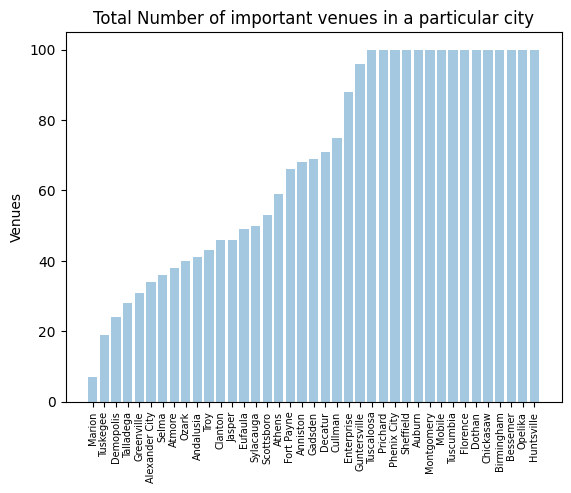

In [25]:
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venues')
plt.title('Total Number of important venues in a particular city')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7)

plt.show()

Here, we can see that how some popular cities reached the limit of venues(100). On the other hand; Marion, Tuskegee, Demopolis, Greenville, Talladega, Selma, Atmore, Alexander City, Andalusia are below 40 venues in our given coordinates with Latitude and Longitude.

### You can also select a particular city for seeing the top venues around the neighborhood.

In [26]:
y = 'Birmingham'
x_data = venues_df[venues_df['Neighborhood'] == y].reset_index(drop=True)
x_data.head()

Neighborhood  Latitude  Longitude                          VenueName  \
0   Birmingham  33.52072  -86.81179           Birmingham Museum Of Art   
1   Birmingham  33.52072  -86.81179                          El Barrio   
2   Birmingham  33.52072  -86.81179              McWane Science Center   
3   Birmingham  33.52072  -86.81179                    The Collins Bar   
4   Birmingham  33.52072  -86.81179  Birmingham Civil Rights Institute   

   Distance  VenueLatitude  VenueLongitude       VenueCategory  
0       218      33.522311      -86.810409          Art Museum  
1       914      33.516913      -86.803053  Mexican Restaurant  
2       674      33.515297      -86.808559      Science Museum  
3       874      33.516507      -86.803835                 Bar  
4       576      33.516083      -86.814564      History Museum

### Moving on to the number of venues that were returned for the selected city.

In [27]:
print('There are {} uniques categories.'.format(len(x_data['VenueCategory'].unique())))

There are 59 uniques categories.


#### Sorting & assigning each venue category a unique venue number.

In [28]:
sortedx = x_data.sort_values('VenueCategory')
sortedx['VenueNumber']=sortedx.groupby(['VenueCategory']).ngroup()
sortedx.head()

Neighborhood  Latitude  Longitude                 VenueName  Distance  \
33   Birmingham  33.52072  -86.81179           Galley & Garden      2929   
79   Birmingham  33.52072  -86.81179                Bricktop's      6139   
61   Birmingham  33.52072  -86.81179             Salem's Diner      4994   
11   Birmingham  33.52072  -86.81179              Pies & Pints      1331   
0    Birmingham  33.52072  -86.81179  Birmingham Museum Of Art       218   

    VenueLatitude  VenueLongitude        VenueCategory  VenueNumber  
33      33.501173      -86.790663  American Restaurant            0  
79      33.476455      -86.772337  American Restaurant            0  
61      33.479228      -86.791315  American Restaurant            0  
11      33.511170      -86.803148  American Restaurant            0  
0       33.522311      -86.810409           Art Museum            1

#### Let's get the geographical coordinates of your selected city.

In [29]:
lati = sortedx.Latitude[0]
lng = sortedx.Longitude[0]
print('The geograpical coordinate of {} are {}, {}.'.format(y, lati, lng))

The geograpical coordinate of Birmingham are 33.52072000000004, -86.81178999999997.


#### Creating a map of the selected city with different venues superimposed on top with there unique venue number and colour.

In [30]:
# create map
map_y = folium.Map(location=[lati, lng], zoom_start=11)

# set color scheme for the categories
xlength = len(x_data['VenueCategory'].unique())
a = np.arange(xlength)
bc = [i + a + (i*a)**2 for i in range(xlength)]
colors_array = iter(cm.rainbow(np.linspace(0, 1, len(bc))))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# drawing radius of search
folium.Circle(location=[lati,lng],radius=radius,color='green',opacity=0.5,fill=True,fill_color='blue').add_to(map_y)

# add markers to the map
markers_colors = []

for lat, lon, cate, nos, city in zip(sortedx.VenueLatitude, sortedx.VenueLongitude, sortedx.VenueCategory, sortedx.VenueNumber, sortedx.Neighborhood):
    label = 'Category:{}, Category No.:{}, City:{}'.format(cate, nos, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[nos-1],
        fill=True,
        fill_opacity=1,
        fill_color=rainbow[nos-1]).add_to(map_y)
       
map_y

## 3. Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting the common kind of cities in a particular state.

In first step we have collected the required **data: dataframe containing list of all 50 states and their cities. We have also **identified top venues** (according to Foursquare categorization).

Second step in our analysis will be exploration of '**top venues**' across different cities of the selected state - we will use **folium** for creating maps of all the top venues in the vicinity.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than five similar clusters of venues in radius of 9.3 Miles**, and we will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## 4. Analysis <a name="analysis"></a>

#### Analyze each neighboring city.

In [31]:
# one hot encoding
y_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
y_onehot['Neighborhoods'] = venues_df['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [y_onehot.columns[-1]] + list(y_onehot.columns[:-1])
y_onehot = y_onehot[fixed_columns]

print(y_onehot.shape)
y_onehot.head()

(2677, 220)


Neighborhoods  Accessories Store  Airport  Airport Terminal  \
0  Alexander City                  0        0                 0   
1  Alexander City                  0        0                 0   
2  Alexander City                  0        0                 0   
3  Alexander City                  0        0                 0   
4  Alexander City                  0        0                 0   

   American Restaurant  Antique Shop  Arcade  Art Museum  Arts & Crafts Store  \
0                    1             0       0           0                    0   
1                    0             0       0           0                    0   
2                    0             0       0           0                    0   
3                    1             0       0           0                    0   
4                    0             0       0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  \
0                 0                   0            0          0           0   
1                 0                   0            0          0           0   
2                 0                   0            0          0           0   
3                 0                   0            0          0           0   
4                 0                   0            0          0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Stadium  \
0       0     0    0               0                 0                   0   
1       0     0    0               0                 0                   0   
2       0     0    0               0                 0                   0   
3       0     0    0               0                 0                   0   
4       0     0    0               0                 0                   0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bistro  Boat or Ferry  \
0         0            0           0              0       0              0   
1         0            0           0              0       0              0   
2         0            0           0              0       0              0   
3         0            0           0              0       0              0   
4         0            0           0              0       0              0   

   Bookstore  Border Crossing  Botanical Garden  Bowling Alley  \
0          0                0                 0              0   
1          0                0                 0              0   
2          0                0                 0              0   
3          0                0                 0              0   
4          0                0                 0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  \
0                     0               0        0       0                0   
1                     0               0        0       0                0   
2                     0               0        0       0                0   
3                     0               0        0       0                0   
4                     0               0        0       0                0   

   Buffet  Burger Joint  Bus Station  Café  Cajun / Creole Restaurant  \
0       0             0            0     0                          0   
1       0             0            0     0                          0   
2       0             0            0     0                          0   
3       0             0            0     0                          0   
4       0             0            0     0                          0   

   Campground  Caribbean Restaurant  Casino  Cave  Cheese Shop  \
0           0                     0       0     0            0   
1           0                     0       0     0            0   
2           0                     0       0     0            0   
3           0                     0       0     0            0   
4           1                     0       0     0            0   

   Ch

#### Next, let's group rows by neighboring city and by taking the mean of the frequency of occurrence of each category.

In [32]:
y_grouped = y_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(y_grouped.shape)
y_grouped.head()

(39, 220)


Neighborhoods  Accessories Store  Airport  Airport Terminal  \
0  Alexander City           0.000000      0.0           0.00000   
1       Andalusia           0.000000      0.0           0.02439   
2        Anniston           0.014706      0.0           0.00000   
3          Athens           0.000000      0.0           0.00000   
4          Atmore           0.000000      0.0           0.00000   

   American Restaurant  Antique Shop  Arcade  Art Museum  Arts & Crafts Store  \
0             0.117647      0.000000     0.0         0.0             0.000000   
1             0.048780      0.000000     0.0         0.0             0.000000   
2             0.014706      0.000000     0.0         0.0             0.014706   
3             0.067797      0.016949     0.0         0.0             0.000000   
4             0.052632      0.000000     0.0         0.0             0.000000   

   Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  Bagel Shop  \
0          0.000000                 0.0          0.0   0.029412         0.0   
1          0.000000                 0.0          0.0   0.024390         0.0   
2          0.014706                 0.0          0.0   0.029412         0.0   
3          0.000000                 0.0          0.0   0.033898         0.0   
4          0.000000                 0.0          0.0   0.000000         0.0   

     Bakery  Bank       Bar  Baseball Field  Baseball Stadium  \
0  0.000000   0.0  0.000000        0.000000               0.0   
1  0.024390   0.0  0.000000        0.000000               0.0   
2  0.014706   0.0  0.014706        0.014706               0.0   
3  0.016949   0.0  0.000000        0.000000               0.0   
4  0.000000   0.0  0.000000        0.000000               0.0   

   Basketball Stadium  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0                 0.0       0.0          0.0         0.0       0.000000   
1                 0.0       0.0          0.0         0.0       0.000000   
2                 0.0       0.0          0.0         0.0       0.000000   
3                 0.0       0.0          0.0         0.0       0.016949   
4                 0.0       0.0          0.0         0.0       0.026316   

   Bistro  Boat or Ferry  Bookstore  Border Crossing  Botanical Garden  \
0     0.0            0.0        0.0         0.000000               0.0   
1     0.0            0.0        0.0         0.000000               0.0   
2     0.0            0.0        0.0         0.000000               0.0   
3     0.0            0.0        0.0         0.000000               0.0   
4     0.0            0.0        0.0         0.052632               0.0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot   Brewery  Bridge  \
0            0.0                   0.0        0.029412  0.000000     0.0   
1            0.0                   0.0        0.024390  0.000000     0.0   
2            0.0                   0.0        0.014706  0.014706     0.0   
3            0.0                   0.0        0.016949  0.000000     0.0   
4            0.0                   0.0        0.026316  0.000000     0.0   

   Bubble Tea Shop    Buffet  Burger Joint  Bus Station      Café  \
0              0.0  0.000000      0.000000          0.0  0.000000   
1              0.0  0.000000      0.000000          0.0  0.000000   
2              0.0  0.000000      0.029412          0.0  0.014706   
3              0.0  0.000000      0.033898          0.0  0.000000   
4              0.0  0.052632      0.000000          0.0  0.026316   

   Cajun / Creole Restaurant  Campground  Caribbean Restaurant    Casino  \
0                        0.0    0.058824                   0.0  0.000000   
1                        0.0    0.000000                   0.0  0.000000   
2                        0.0    0.000000                   0.0  0.000000   
3                        0.0    0.000000                   0.0  0.000000   
4                        0.0    0.000000                   0.0  0.026316   

   Cave  Cheese Shop  C

## Here we can check percentage existence of any particular category of venue in all the cities of the selected state.

In [33]:
len(y_grouped[y_grouped["Seafood Restaurant"] > 0])

34

In [34]:
y_seafood = y_grouped[["Neighborhoods","Seafood Restaurant"]]
y_seafood.head()

Neighborhoods  Seafood Restaurant
0  Alexander City            0.029412
1       Andalusia            0.024390
2        Anniston            0.014706
3          Athens            0.033898
4          Atmore            0.026316

#### Let's print each neighboring city along with the top 5 most common venues.

In [35]:
num_top_venues = 5

for hood in y_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = y_grouped[y_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alexander City----
                  venue  freq
0   American Restaurant  0.12
1  Fast Food Restaurant  0.12
2           Gas Station  0.09
3         Grocery Store  0.09
4           Pizza Place  0.06


----Andalusia----
                  venue  freq
0        Discount Store  0.12
1        Sandwich Place  0.10
2  Fast Food Restaurant  0.10
3              Pharmacy  0.07
4   Fried Chicken Joint  0.07


----Anniston----
                  venue  freq
0  Fast Food Restaurant  0.07
1        Discount Store  0.04
2           Gas Station  0.04
3        Cosmetics Shop  0.03
4                  Food  0.03


----Athens----
                  venue  freq
0        Discount Store  0.20
1   American Restaurant  0.07
2         Grocery Store  0.05
3  Fast Food Restaurant  0.05
4           Pizza Place  0.05


----Atmore----
                  venue  freq
0  Fast Food Restaurant  0.16
1       Border Crossing  0.05
2                Buffet  0.05
3     Convenience Store  0.05
4        Sandwich Place  0.05


--

### Let's put that into a _pandas_ dataframe.

#### First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = y_grouped['Neighborhoods']

for ind in np.arange(y_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(y_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhoods 1st Most Common Venue 2nd Most Common Venue  \
0  Alexander City   American Restaurant  Fast Food Restaurant   
1       Andalusia        Discount Store        Sandwich Place   
2        Anniston  Fast Food Restaurant        Discount Store   
3          Athens        Discount Store   American Restaurant   
4          Atmore  Fast Food Restaurant       Border Crossing   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Gas Station         Grocery Store           Pizza Place   
1  Fast Food Restaurant              Pharmacy   Fried Chicken Joint   
2           Gas Station        Cosmetics Shop                  Food   
3         Grocery Store  Fast Food Restaurant           Pizza Place   
4                Buffet     Convenience Store        Sandwich Place   

  6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0            Campground   Fried Chicken Joint  State / Provincial Park   
1   American Restaurant           Pizza Place       Chinese Restaurant   
2              Pharmacy      Department Store                      Gym   
3    Mexican Restaurant        Sandwich Place             Burger Joint   
4   Fried Chicken Joint         Grocery Store      American Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0        Discount Store         Sandwich Place  
1        Breakfast Spot                   Food  
2             BBQ Joint     Italian Restaurant  
3     Convenience Store     Seafood Restaurant  
4        Discount Store                   Park

### Cluster Neighboring cities

#### Run _k_-means to cluster the neighboring cities into 5 clusters according to their similarities in venues.

In [38]:
# set number of clusters
kclusters = 5

y_grouped_clustering = y_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(y_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

C:\Users\visha\AppData\Local\Temp\ipykernel_20796\2060809461.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  y_grouped_clustering = y_grouped.drop('Neighborhoods', 1)
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 1, 3, 3, 3, 3, 1])

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighboring city.

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

y_merged = state_df

# merge y_grouped with state_df to add latitude/longitude for each neighborhood
y_merged = y_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

y_merged.head() #Cluster labels included

Neighborhood  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  Alexander City  32.93884  -85.95295               1   American Restaurant   
1       Andalusia  31.32014  -86.49449               1        Discount Store   
2        Anniston  33.65712  -85.81891               0  Fast Food Restaurant   
3          Athens  34.80450  -86.97128               0        Discount Store   
4          Atmore  31.02526  -87.49380               1  Fast Food Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0  Fast Food Restaurant           Gas Station         Grocery Store   
1        Sandwich Place  Fast Food Restaurant              Pharmacy   
2        Discount Store           Gas Station        Cosmetics Shop   
3   American Restaurant         Grocery Store  Fast Food Restaurant   
4       Border Crossing                Buffet     Convenience Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Pizza Place            Campground   Fried Chicken Joint   
1   Fried Chicken Joint   American Restaurant           Pizza Place   
2                  Food              Pharmacy      Department Store   
3           Pizza Place    Mexican Restaurant        Sandwich Place   
4        Sandwich Place   Fried Chicken Joint         Grocery Store   

     8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  State / Provincial Park        Discount Store         Sandwich Place  
1       Chinese Restaurant        Breakfast Spot                   Food  
2                      Gym             BBQ Joint     Italian Restaurant  
3             Burger Joint     Convenience Store     Seafood Restaurant  
4      American Restaurant        Discount Store                   Park

One of my aim was also show the number of top 3 venues information for each city for more deep study purposes. Thus, I grouped each city by the number of top 3 venues and I combined those informations in Top 3 venues column.

In [40]:
top3 = venues_df.groupby(['Neighborhood','VenueCategory']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Neighborhood','Counts'],ascending=False).groupby('Neighborhood').head(3).reset_index(drop=True)

top3['Top 3 Venues'] = top3['Counts'].map(str) + " " + top3['VenueCategory']
top3 = top3.groupby(['Neighborhood'])['Top 3 Venues'].apply(", ".join).reset_index()
pd.options.display.max_colwidth = 100

top3.head(10)

Neighborhood  \
0  Alexander City   
1       Andalusia   
2        Anniston   
3          Athens   
4          Atmore   
5          Auburn   
6        Bessemer   
7      Birmingham   
8       Chickasaw   
9         Clanton   

                                                       Top 3 Venues  
0      4 American Restaurant, 4 Fast Food Restaurant, 3 Gas Station  
1        5 Discount Store, 4 Fast Food Restaurant, 4 Sandwich Place  
2           5 Fast Food Restaurant, 3 Discount Store, 3 Gas Station  
3  12 Discount Store, 4 American Restaurant, 3 Fast Food Restaurant  
4  6 Fast Food Restaurant, 2 American Restaurant, 2 Border Crossing  
5               7 American Restaurant, 5 BBQ Joint, 5 Grocery Store  
6    7 Fast Food Restaurant, 7 Grocery Store, 4 American Restaurant  
7             7 Coffee Shop, 7 Grocery Store, 4 American Restaurant  
8              7 Grocery Store, 6 Coffee Shop, 5 Seafood Restaurant  
9                   5 Fast Food Restaurant, 4 Hotel, 3 Burger Joint

#### We can also estimate the number of 1st Most Common Venue, 2nd Most Common Venue & 3rd Most Common Venue in each cluster. Thus, we can create a bar chart which may help us to find which venue is concentrated in which cluster.

In [41]:
count_venue = y_merged
count_venue = count_venue.drop(['Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')
count_venue['Cluster Labels'] = count_venue['Cluster Labels'] + 1

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster.index += 1 
cv_cluster

1st Most Common Venue  American Restaurant  Bus Station  Coffee Shop  \
1                                        0            0            0   
2                                        1            0            0   
3                                        0            1            0   
4                                        4            0            1   
5                                        0            0            0   

1st Most Common Venue  Discount Store  Fast Food Restaurant  \
1                                   6                     5   
2                                   2                     5   
3                                   0                     0   
4                                   0                     1   
5                                   0                     0   

1st Most Common Venue  Fried Chicken Joint  Gas Station  Grocery Store  \
1                                        0            0              0   
2                                        0            1              0   
3                                        0            0              0   
4                                        1            0              3   
5                                        0            0              0   

1st Most Common Venue  Mexican Restaurant  Pharmacy  Rest Area  \
1                                       2         0          0   
2                                       0         0          0   
3                                       0         0          0   
4                                       1         1          0   
5                                       0         0          1   

1st Most Common Venue  Sandwich Place  Seafood Restaurant  
1                                   1                   0  
2                                   0                   0  
3                                   0                   0  
4                                   1                   1  
5                                   0                   0

In [42]:
count_venue1 = y_merged
count_venue1 = count_venue1.drop(['Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue1 = count_venue1.groupby(['Cluster Labels','2nd Most Common Venue']).size().reset_index(name='Counts1')
count_venue1['Cluster Labels'] = count_venue1['Cluster Labels'] + 1

#we can transpose it to plot bar chart
cv_cluster1 = count_venue1.pivot(index='Cluster Labels', columns='2nd Most Common Venue', values='Counts1')
cv_cluster1 = cv_cluster1.fillna(0).astype(int).reset_index(drop=True)
cv_cluster1.index += 1 
cv_cluster1

2nd Most Common Venue  American Restaurant  BBQ Joint  Border Crossing  \
1                                        1          0                0   
2                                        0          0                1   
3                                        0          0                0   
4                                        2          1                0   
5                                        0          0                0   

2nd Most Common Venue  Coffee Shop  Discount Store  Fast Food Restaurant  \
1                                0               4                     4   
2                                0               2                     3   
3                                0               1                     0   
4                                3               0                     0   
5                                0               0                     1   

2nd Most Common Venue  Fried Chicken Joint  Gas Station  Grocery Store  Hotel  \
1                                        0            0              2      0   
2                                        0            1              0      1   
3                                        0            0              0      0   
4                                        1            0              6      0   
5                                        0            0              0      0   

2nd Most Common Venue  Mexican Restaurant  Pizza Place  Sandwich Place  
1                                       1            2               0  
2                                       0            0               1  
3                                       0            0               0  
4                                       1            0               0  
5                                       0            0               0

In [43]:
count_venue2 = y_merged
count_venue2 = count_venue2.drop(['Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue2 = count_venue2.groupby(['Cluster Labels','3rd Most Common Venue']).size().reset_index(name='Counts2')
count_venue2['Cluster Labels'] = count_venue2['Cluster Labels'] + 1

#we can transpose it to plot bar chart
cv_cluster2 = count_venue2.pivot(index='Cluster Labels', columns='3rd Most Common Venue', values='Counts2')
cv_cluster2 = cv_cluster2.fillna(0).astype(int).reset_index(drop=True)
cv_cluster2.index += 1 
cv_cluster2

3rd Most Common Venue  American Restaurant  BBQ Joint  Buffet  Burger Joint  \
1                                        1          2       0             1   
2                                        1          0       1             0   
3                                        0          0       0             0   
4                                        0          0       0             0   
5                                        0          0       0             0   

3rd Most Common Venue  Coffee Shop  Convenience Store  Discount Store  \
1                                0                  1               3   
2                                0                  0               1   
3                                0                  0               0   
4                                1                  0               0   
5                                0                  0               0   

3rd Most Common Venue  Fast Food Restaurant  Fried Chicken Joint  Gas Station  \
1                                         1                    0            1   
2                                         1                    1            2   
3                                         1                    0            0   
4                                         2                    0            0   
5                                         0                    0            0   

3rd Most Common Venue  Grocery Store  Historic Site  Hotel  \
1                                  2              0      0   
2                                  0              0      1   
3                                  0              0      0   
4                                  1              0      3   
5                                  0              1      0   

3rd Most Common Venue  Mexican Restaurant  Pharmacy  Pizza Place  \
1                                       0         0            2   
2                                       0         1            0   
3                                       0         0            0   
4                                       2         0            1   
5                                       0         0            0   

3rd Most Common Venue  Sandwich Place  Seafood Restaurant  \
1                                   0                   0   
2                                   0                   0   
3                                   0                   0   
4                                   2                   1   
5                                   0                   0   

3rd Most Common Venue  Southern / Soul Food Restaurant  
1                                                    0  
2                                                    0  
3                                                    0  
4                                                    1  
5                                                    0

## 5. Results and Discussion <a name="results"></a>

Text(0, 0.5, 'Number of Venues')

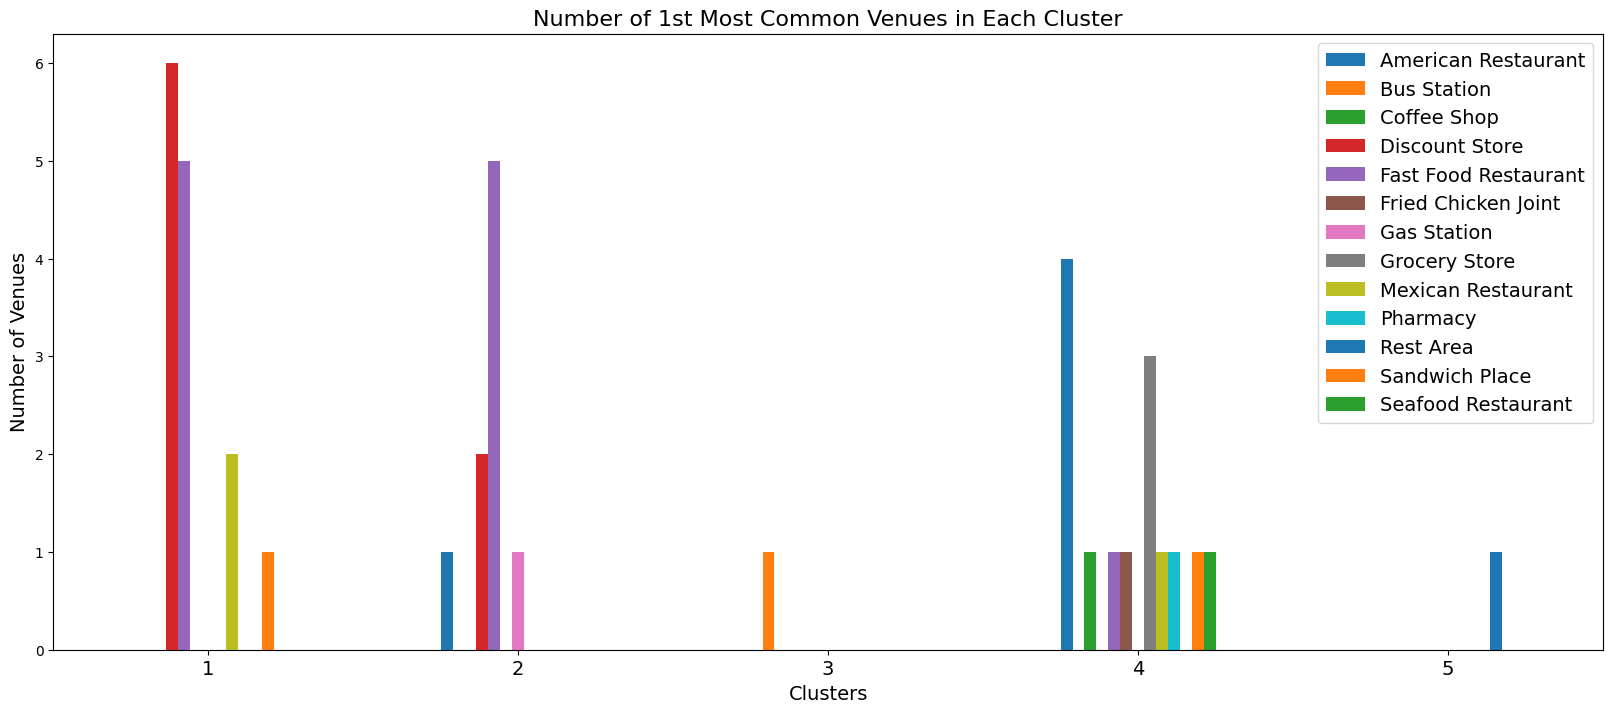

In [44]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.5)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of 1st Most Common Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Venues', fontsize=14)

Text(0, 0.5, 'Number of Venues')

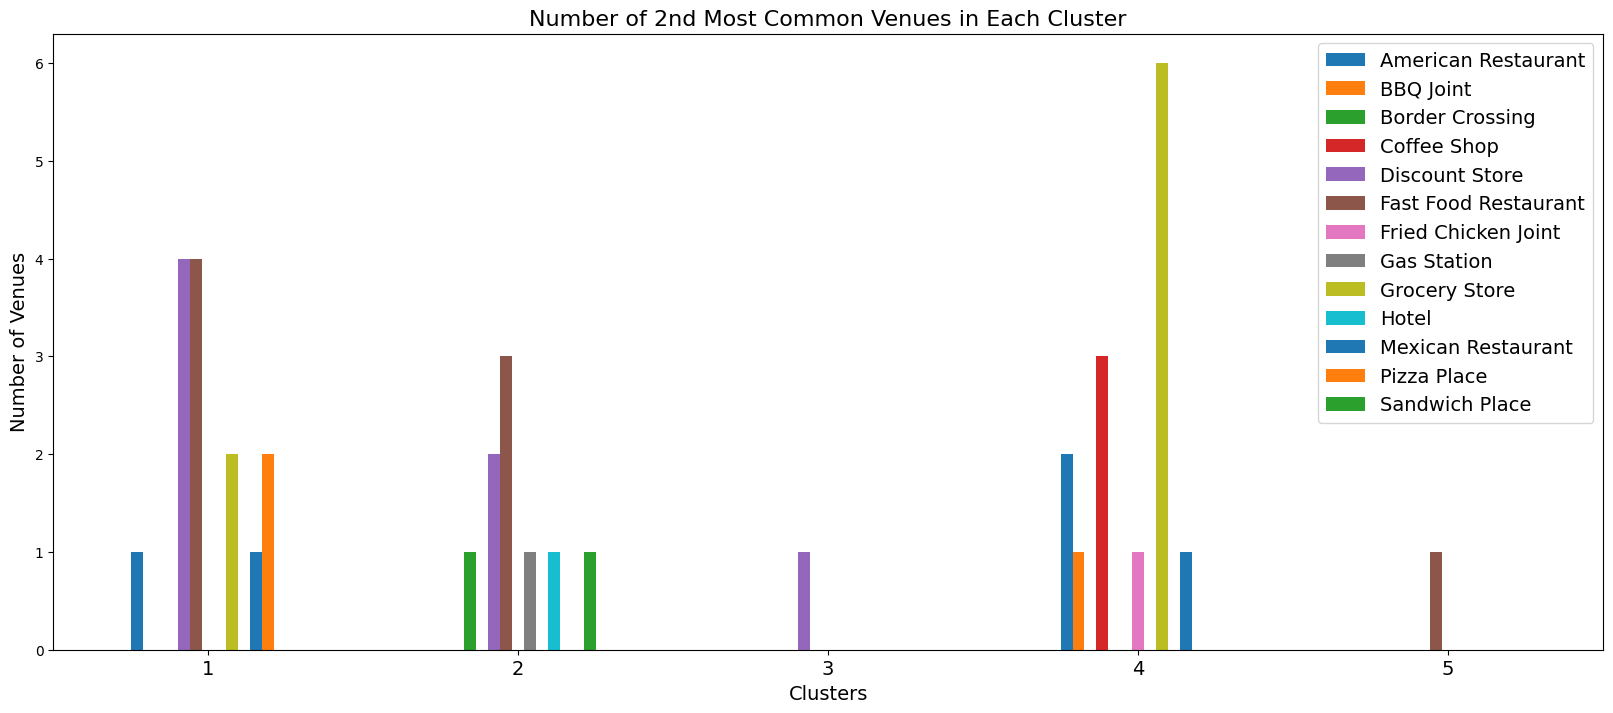

In [45]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster1.plot(kind='bar',figsize=(20,8),width = 0.5)

plt.legend(labels=cv_cluster1.columns,fontsize= 14)
plt.title("Number of 2nd Most Common Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Venues', fontsize=14)

Text(0, 0.5, 'Number of Venues')

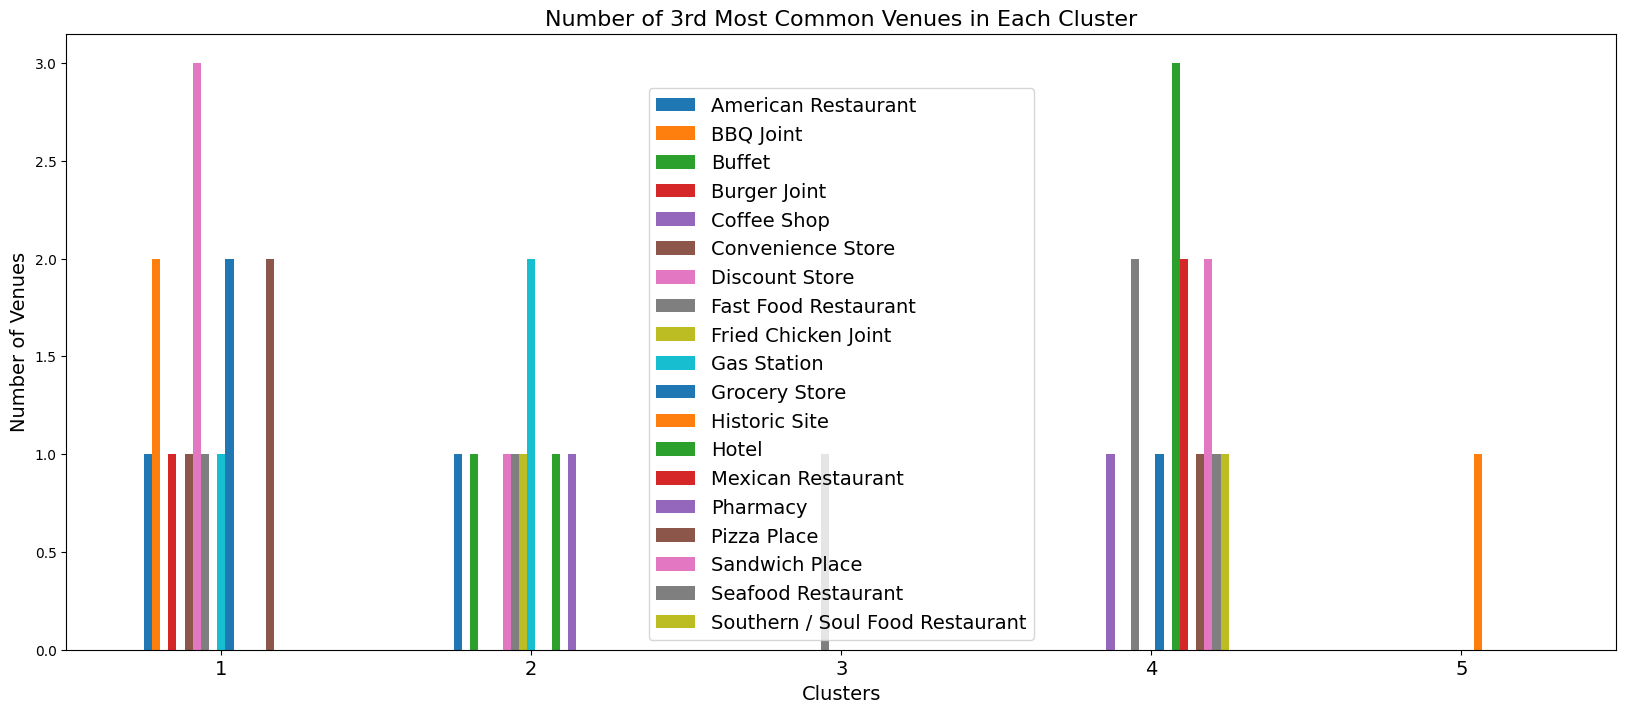

In [46]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster2.plot(kind='bar',figsize=(20,8),width = 0.5)

plt.legend(labels=cv_cluster2.columns,fontsize= 14)
plt.title("Number of 3rd Most Common Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Venues', fontsize=14)

#### Let's visualize the clusters.

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(y_merged['Latitude'], y_merged['Longitude'], y_merged['Neighborhood'], y_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Now, we can examine each cluster & determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster like cities with top common venues containing restaurants.

#### Cluster 1

In [48]:
y_merged.loc[y_merged['Cluster Labels'] == 0, y_merged.columns[[0] + list(range(4, y_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2       Anniston  Fast Food Restaurant        Discount Store   
3         Athens        Discount Store   American Restaurant   
10       Cullman    Mexican Restaurant  Fast Food Restaurant   
11       Decatur    Mexican Restaurant        Discount Store   
14    Enterprise        Sandwich Place  Fast Food Restaurant   
15       Eufaula        Discount Store  Fast Food Restaurant   
16      Florence        Discount Store         Grocery Store   
17    Fort Payne  Fast Food Restaurant        Discount Store   
18       Gadsden  Fast Food Restaurant    Mexican Restaurant   
20  Guntersville  Fast Food Restaurant        Discount Store   
22        Jasper        Discount Store           Pizza Place   
30    Scottsboro  Fast Food Restaurant           Pizza Place   
32     Sheffield        Discount Store         Grocery Store   
37     Tuscumbia        Discount Store  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2            Gas Station        Cosmetics Shop                  Food   
3          Grocery Store  Fast Food Restaurant           Pizza Place   
10             BBQ Joint        Discount Store          Burger Joint   
11             BBQ Joint         Grocery Store  Fast Food Restaurant   
14        Discount Store           Pizza Place                 Hotel   
15     Convenience Store            Restaurant        Sandwich Place   
16          Burger Joint    Mexican Restaurant            Steakhouse   
17           Pizza Place        Sandwich Place    Mexican Restaurant   
18        Discount Store   American Restaurant   Fried Chicken Joint   
20           Pizza Place    Mexican Restaurant           Gas Station   
22   American Restaurant  Fast Food Restaurant         Grocery Store   
30        Discount Store   American Restaurant           Video Store   
32  Fast Food Restaurant          Burger Joint   Fried Chicken Joint   
37         Grocery Store          Burger Joint   Fried Chicken Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2               Pharmacy      Department Store                   Gym   
3     Mexican Restaurant        Sandwich Place          Burger Joint   
10   Fried Chicken Joint        Sandwich Place   American Restaurant   
11        Sandwich Place              Pharmacy                  Park   
14           Coffee Shop        Breakfast Spot                   Gym   
15           Pizza Place    Mexican Restaurant        Breakfast Spot   
16           Pizza Place  Fast Food Restaurant   Fried Chicken Joint   
17     Convenience Store         Grocery Store           Gas Station   
18         Grocery Store                Bakery    Seafood Restaurant   
20         Grocery Store    Seafood Restaurant        Breakfast Spot   
22    Mexican Restaurant             BBQ Joint     Mobile Phone Shop   
30        Sandwich Place     Convenience Store                 Hotel   
32    Mexican Restaurant            Steakhouse           Coffee Shop   
37    Mexican Restaurant            Steakhouse           Gas Station   

              9th Most Common Venue 10th Most Common Venue  
2                         BBQ Joint     Italian Restaurant  
3                 Convenience Store     Seafood Restaurant  
10                 Department Store          Deli / Bodega  
11                      Coffee Shop             Steakhouse  
14                    Grocery Store       Department Store  
15                          Airport              BBQ Joint  
16              American Restaurant                 Museum  
17              Fried Chicken Joint             Steakhouse  
18                   Ice Cream Shop         Breakfast Spot  
20                            Hotel               Pharmacy  
22  Southern / Soul Food Restaurant           Burger Joint  
30                    Grocery Store                    Bar  
32                      Pizza Place    American Restaurant  
37                      Cof

#### Cluster 2

In [49]:
y_merged.loc[y_merged['Cluster Labels'] == 1, y_merged.columns[[0] + list(range(4, y_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Alexander City   American Restaurant  Fast Food Restaurant   
1        Andalusia        Discount Store        Sandwich Place   
4           Atmore  Fast Food Restaurant       Border Crossing   
9          Clanton  Fast Food Restaurant                 Hotel   
12       Demopolis           Gas Station  Fast Food Restaurant   
19      Greenville  Fast Food Restaurant        Discount Store   
27           Ozark  Fast Food Restaurant           Gas Station   
33       Sylacauga  Fast Food Restaurant        Discount Store   
34       Talladega        Discount Store  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Gas Station         Grocery Store           Pizza Place   
1   Fast Food Restaurant              Pharmacy   Fried Chicken Joint   
4                 Buffet     Convenience Store        Sandwich Place   
9         Discount Store        Sandwich Place          Burger Joint   
12                 Hotel        Sandwich Place   Fried Chicken Joint   
19           Gas Station             Rest Area   American Restaurant   
27   American Restaurant               Airport                 Hotel   
33   Fried Chicken Joint        Sandwich Place    Mexican Restaurant   
34              Pharmacy   Fried Chicken Joint     Convenience Store   

   6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0             Campground   Fried Chicken Joint  State / Provincial Park   
1    American Restaurant           Pizza Place       Chinese Restaurant   
4    Fried Chicken Joint         Grocery Store      American Restaurant   
9    American Restaurant           Gas Station             Intersection   
12           Pizza Place    Seafood Restaurant                 Pharmacy   
19        Sandwich Place                 Hotel                 Pharmacy   
27   Fried Chicken Joint           Pizza Place                Rest Area   
33     Convenience Store        Ice Cream Shop                BBQ Joint   
34           Pizza Place        Sandwich Place                Racetrack   

   9th Most Common Venue 10th Most Common Venue  
0         Discount Store         Sandwich Place  
1         Breakfast Spot                   Food  
4         Discount Store                   Park  
9                   Park          Grocery Store  
12             BBQ Joint      Convenience Store  
19    Mexican Restaurant             Restaurant  
27  Gym / Fitness Center      Food & Drink Shop  
33              Pharmacy          Grocery Store  
34    Mexican Restaurant              Gun Range

#### Cluster 3

In [50]:
y_merged.loc[y_merged['Cluster Labels'] == 2, y_merged.columns[[0] + list(range(4, y_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
23       Marion           Bus Station        Discount Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
23  Fast Food Restaurant    Travel & Transport        Sandwich Place   

   6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
23         Grocery Store                 Hotel  New American Restaurant   

   9th Most Common Venue 10th Most Common Venue  
23          Outlet Store           Neighborhood

#### Cluster 4

In [51]:
y_merged.loc[y_merged['Cluster Labels'] == 3, y_merged.columns[[0] + list(range(4, y_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
5        Auburn   American Restaurant         Grocery Store   
6      Bessemer  Fast Food Restaurant         Grocery Store   
7    Birmingham         Grocery Store           Coffee Shop   
8     Chickasaw         Grocery Store           Coffee Shop   
13       Dothan   American Restaurant    Mexican Restaurant   
21   Huntsville    Mexican Restaurant   American Restaurant   
24       Mobile    Seafood Restaurant         Grocery Store   
25   Montgomery   American Restaurant         Grocery Store   
26      Opelika   American Restaurant         Grocery Store   
28  Phenix City         Grocery Store           Coffee Shop   
29     Prichard           Coffee Shop         Grocery Store   
31        Selma   Fried Chicken Joint             BBQ Joint   
35         Troy              Pharmacy   Fried Chicken Joint   
36   Tuscaloosa        Sandwich Place   American Restaurant   

              3rd Most Common Venue            4th Most Common Venue  \
5                    Sandwich Place                        BBQ Joint   
6                       Coffee Shop                              Gym   
7                Mexican Restaurant              American Restaurant   
8                Seafood Restaurant  Southern / Soul Food Restaurant   
13                            Hotel                    Grocery Store   
21                    Grocery Store                      Pizza Place   
24                            Hotel                      Coffee Shop   
25                      Pizza Place               Seafood Restaurant   
26                   Sandwich Place                      Pizza Place   
28             Fast Food Restaurant               Mexican Restaurant   
29  Southern / Soul Food Restaurant                            Hotel   
31                            Hotel                      Gas Station   
35             Fast Food Restaurant              American Restaurant   
36               Mexican Restaurant                              Bar   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5            Pizza Place  Fast Food Restaurant             Gastropub   
6    American Restaurant   Fried Chicken Joint          Burger Joint   
7                   Park                 Trail        Ice Cream Shop   
8                  Hotel                   Bar   Fried Chicken Joint   
13   Fried Chicken Joint        Sandwich Place  Fast Food Restaurant   
21           Coffee Shop          Burger Joint  Fast Food Restaurant   
24    Italian Restaurant   Fried Chicken Joint             BBQ Joint   
25           Coffee Shop    Mexican Restaurant                 Hotel   
26              Pharmacy             BBQ Joint    Frozen Yogurt Shop   
28        Ice Cream Shop   American Restaurant                 Hotel   
29    Seafood Restaurant                   Bar        Sandwich Place   
31         Grocery Store              Pharmacy        Sandwich Place   
35        Discount Store    Mexican Restaurant                 Hotel   
36           Coffee Shop  Fast Food Restaurant    Seafood Restaurant   

              8th Most Common Venue  9th Most Common Venue  \
5                          Pharmacy     Mexican Restaurant   
6                    Discount Store         Ice Cream Shop   
7                         BBQ Joint   Fast Food Restaurant   
8                         BBQ Joint            Music Venue   
13                   Breakfast Spot            Pizza Place   
21                   Science Museum  Performing Arts Venue   
24                   Ice Cream Shop                   Café   
25             Fast Food Restaurant                    Bar   
26               Italian Restaurant           Burger Joint   
28  Southern / Soul Food Restaurant            Pizza Place   
29                        BBQ Joint            Music Venue   
31                      Pizza Place   Fast Food Restaurant   
35                   Ice Cream Shop          Deli / Bodega   
36                    Groce

#### Cluster 5

In [52]:
y_merged.loc[y_merged['Cluster Labels'] == 4, y_merged.columns[[0] + list(range(4, y_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
38     Tuskegee             Rest Area  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
38         Historic Site           Gas Station        Sandwich Place   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
38                Forest                Museum         Grocery Store   

   9th Most Common Venue 10th Most Common Venue  
38             Gun Range     Basketball Stadium

As we get our observations from the map in Results section, most of the neighbouring cities are concentrated into cluster 2 & 5. On the other hand, cluster 1 & 3 have only two cities each whereas cluster 4 is quite unique with only 1 city. We can also observe here from the graphs that cluster 5 is missing or have very low ‘Discount Store’ & ‘Fast Food Restaurant’. This represents a great opportunity to open or invest in these categories of venues in cluster 5 cities or vice-versa we can observe that cluster 2 is missing on or have low number of ‘Coffee Shops’ as compared from cluster 5 thus creating also a great opportunity to open or invest in that category. From another perspective, the results also shows that the oversupply of ‘Discount Store’ & ‘Fast Food Restaurant’ are present in the cluster 2 cities. Property developers with unique selling propositions will stand out moreover they will face no or less competition if they go forward with the above-mentioned opportunity. Therefore, this project recommends property developers to capitalize on these findings to open or invest in any business category in a particular city or area. Moreover, property developers or investors should be wary if they want to open ‘Discount Store’ in cluster 1 cities. This can also benefit people wanting to move to a new place and if they have a particular need for a venue like say ‘Discount Store’ for an economic friendly stay, then they can move to cluster 2 cities. Also, we can compare all the cities of the state as how they are similar or dissimilar. Thus, the battle between them.

## 6. Conclusion <a name="conclusion"></a>

In this study, I analysed the similarities & dissimilarities between the cities of a particular state. I identified the different categories of venues and sorted them. Then by means of graphical representation & k-means clustering, I categorized different cities into cluster groups. The model will help many stakeholders & business people to predict the profit for opening a particular business in a particular area or also, if they should open that particular business or not. People are turning to big cities to start a business or work. They can achieve better outcomes through their access to the platforms where such information is provided. And, not only for investors but also city managers can manage the city more regularly by using similar data analysis types or platforms.